In [1]:
import numpy
import matplotlib.pyplot
import scipy.special

%matplotlib inline

In [2]:
class NeuralNetwork:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.iNodes = inputNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        self.lRate = learningRate
        
        self.wih = numpy.random.normal(0.0, pow(self.hNodes, -0.5), (self.hNodes, self.iNodes))
        self.who = numpy.random.normal(0.0, pow(self.oNodes, -0.5), (self.oNodes, self.hNodes))
        
        self.activationFunction = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self,inputList, targetList):
        inputs = numpy.array(inputList,ndmin=2).T
        targets = numpy.array(targetList, ndmin=2).T
        
        hiddenInputs = numpy.dot(self.wih, inputs)
        hiddenOutputs = self.activationFunction(hiddenInputs)
        
        finalInputs = numpy.dot(self.who, hiddenOutputs)
        finalOutputs = self.activationFunction(finalInputs)
        
        outputError = targets - finalOutputs
        hiddenError = numpy.dot(self.who.T, outputError)
        
        self.who += self.lRate * numpy.dot((outputError*finalOutputs * (1.0-finalOutputs)),numpy.transpose(hiddenOutputs)) 
        self.wih += self.lRate * numpy.dot((hiddenError*hiddenOutputs*(1.0-hiddenOutputs)),numpy.transpose(inputs))
        pass
    
    def query(self, inputsList):
        #convert to array
        inputs = numpy.array(inputsList, ndmin = 2).T
        
        #calculate signals to hidden layer
        hiddenInputs = numpy.dot(self.wih,inputs)
        #calculate the signals emerging from hidden layer
        hiddenOutputs = self.activationFunction(hiddenInputs)
        # calculate signals into final output layer
        finalInputs = numpy.dot(self.who,hiddenOutputs)
        #calculate the signals emerging from final output layer
        finalOutputs = self.activationFunction(finalInputs)
        
        return finalOutputs
    

In [3]:
inputNodes = 784
hiddenNodes = 200
outputNodes = 10
# learning rate is 0.1
learningRate = 0.1
# create instance of neural network
n = NeuralNetwork(inputNodes,hiddenNodes,outputNodes, learningRate)

In [4]:
trainingDataFile = open("C:\\Users\\Stefan\\Desktop\\mnist_train.csv", 'r')
trainingDataList = trainingDataFile.readlines()
trainingDataFile.close()

#all_values = trainingDataList[7].split(',')
#image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
epochs = 5
for e in range(epochs):
    for record in trainingDataList:
        allValues = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(allValues[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(outputNodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(allValues[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [5]:
testingDataFile = open("C:\\Users\\Stefan\\Desktop\\mnist_test.csv", 'r')
testingDataList = testingDataFile.readlines()
testingDataFile.close()

scorecard = []

#numpy.set_printoptions(suppress=True)
#all_values = testingDataList[8].split(',')
#image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') 
#print("Number: ",all_values[0])


for record in testingDataList:
    allValue = record.split(',')
    correctLabel = int(allValue[0])
    inputs = (numpy.asfarray(allValue[1:]) /255.0 * 0.99) + 0.01 
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if(label == correctLabel):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecardArray = numpy.asarray(scorecard)
print ("Performance = ", scorecardArray.sum() / scorecardArray.size)


Performance =  0.9724


The number is:  3


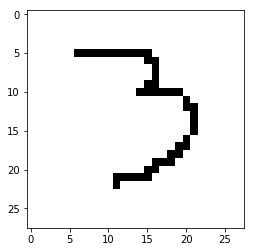

In [13]:
import scipy.misc
imageArray = scipy.misc.imread("C:\\Users\\Stefan\\Desktop\\MyOwnPicture.png",flatten = True)

imageData = 255.0 - imageArray.reshape(784)
imageData = (imageData/255.0 * 0.99) + 0.01

outp = n.query(imageData)

label = numpy.argmax(outp)

print("The number is: ", label)

imageD = imageData.reshape((28,28))
matplotlib.pyplot.imshow(imageD, cmap='Greys', interpolation='None') 